In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

<Axes: ylabel='count'>

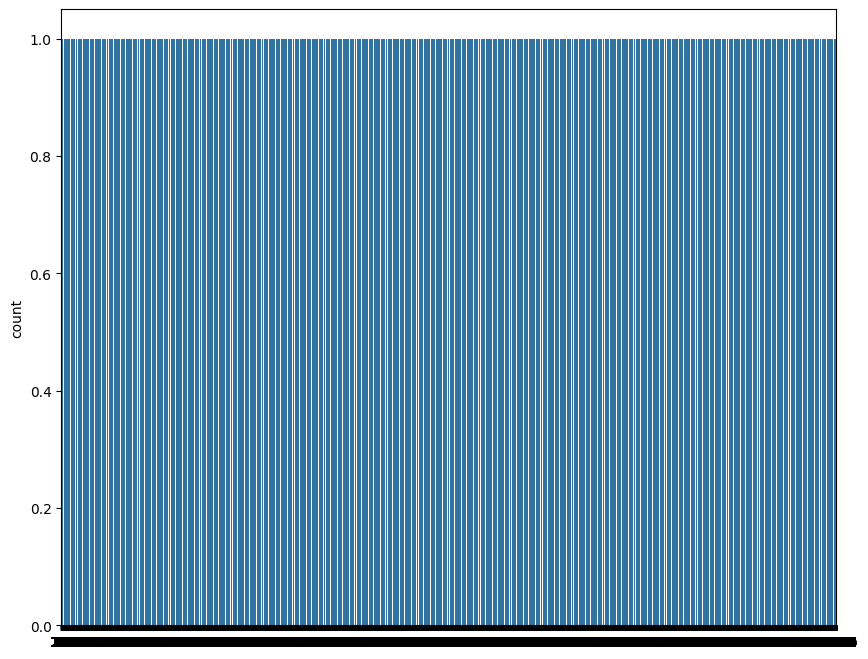

In [3]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

<Axes: ylabel='count'>

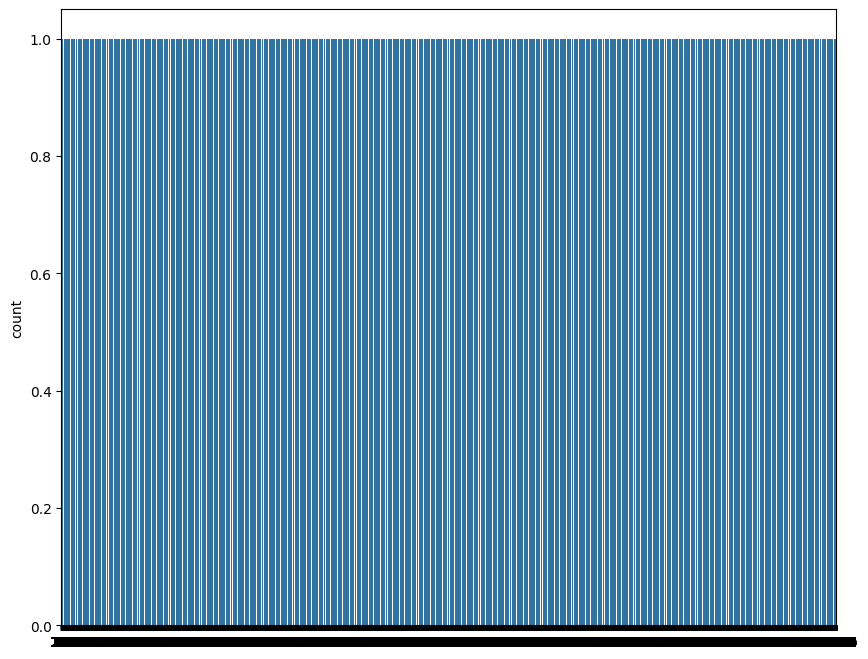

In [4]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

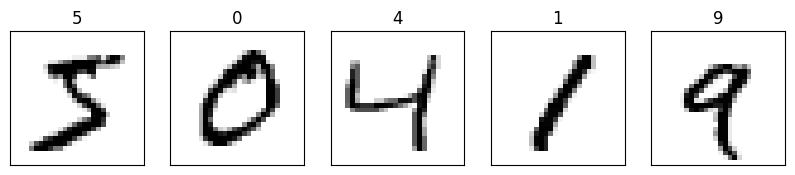

In [5]:
#Dataset properties
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [6]:
# Pre-processing the data
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [8]:
#applying normalization
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [10]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

C:\Users\Souymo Tewari\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Train the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 122s 71ms/step - accuracy: 0.8468 - loss: 0.5515 - val_accuracy: 0.9795 - val_loss: 0.0844
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 119s 70ms/step - accuracy: 0.9644 - loss: 0.1186 - val_accuracy: 0.9857 - val_loss: 0.0734
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 120s 71ms/step - accuracy: 0.9744 - loss: 0.0874 - val_accuracy: 0.9843 - val_loss: 0.0826
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 120s 71ms/step - accuracy: 0.9762 - loss: 0.0806 - val_accuracy: 0.9868 - val_loss: 0.0896
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 120s 71ms/step - accuracy: 0.9795 - loss: 0.0690 - val_accuracy: 0.9867 - val_loss: 0.0815
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 121s 72ms/step - accuracy: 0.9824 - loss: 0.0605 - val_accuracy: 0.9870 - val_loss: 0.0944
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 122s 72ms/step - accuracy: 0.9852 - loss: 0.0537 - val_accuracy: 0.9853 - val_loss: 0.1004
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 122s 72ms/step - accuracy: 

In [12]:
model.save('MNproject.h5')

In [13]:
import os
print(os.path.exists('MNproject.h5'))

True


In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras import activations
# Define a mapping of the custom activation function
custom_objects = {'softmax_v2': activations.softmax}
# Load the model with the custom activation
model = load_model('MNproject.h5', custom_objects=custom_objects)
# Save the model's configuration as a JSON file
model_json = model.to_json()
# Save JSON to disk
with open("model_config.json", "w") as json_file:
json_file.write(model_json)

In [19]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9851 - loss: 3.3873
Test Loss 2.5125393867492676
Test Accuracy 0.989300012588501


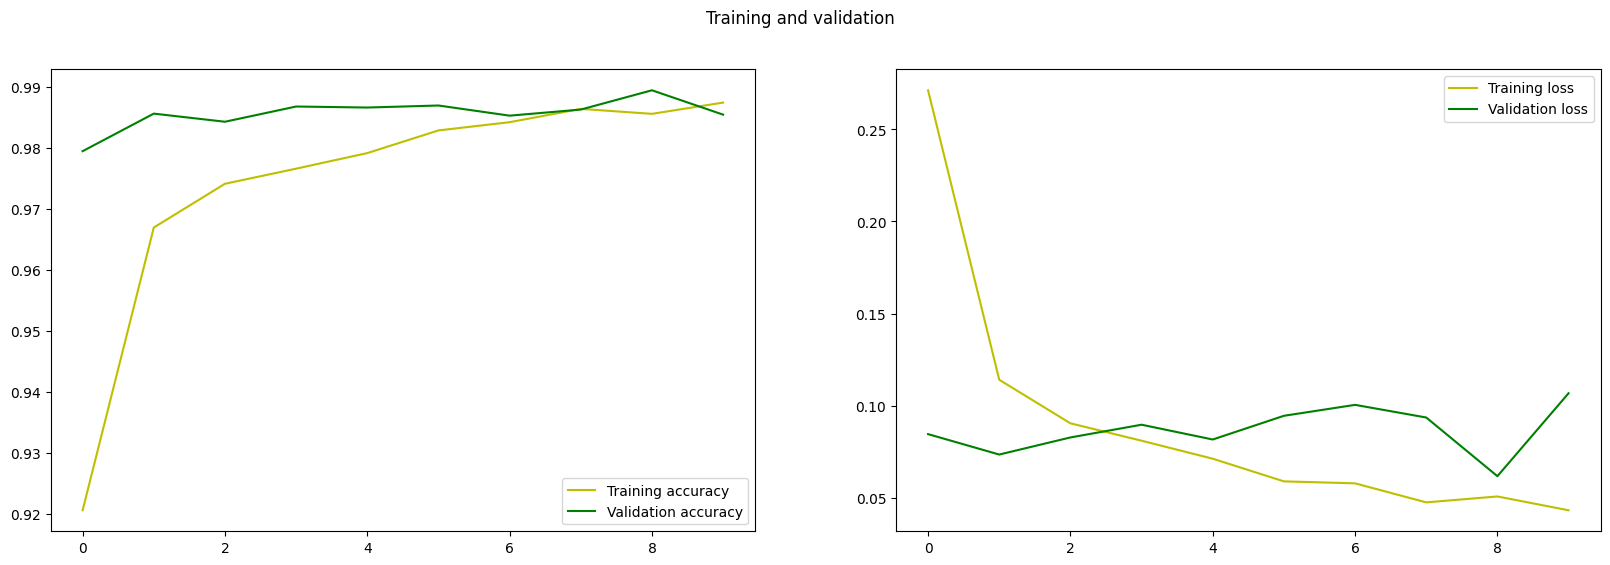

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)
plt.suptitle('Training and validation')
plt.show()

In [21]:
# Confusion Matrix
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    0,    2,    0,    3,    1,    1,    0],
       [   1, 1124,    1,    1,    2,    1,    3,    2,    0,    0],
       [   2,    0, 1023,    0,    1,    0,    0,    6,    0,    0],
       [   0,    0,    4, 1000,    0,    3,    0,    1,    1,    1],
       [   0,    0,    0,    0,  978,    0,    1,    0,    1,    2],
       [   0,    0,    0,    6,    0,  882,    3,    1,    0,    0],
       [   2,    1,    1,    0,    2,    3,  949,    0,    0,    0],
       [   0,    1,    3,    0,    1,    0,    0, 1023,    0,    0],
       [   3,    0,    2,    1,    1,    1,    2,    1,  962,    1],
       [   3,    0,    1,    0,   16,    5,    0,    5,    0,  979]])>

Text(95.72222222222221, 0.5, 'Truth')

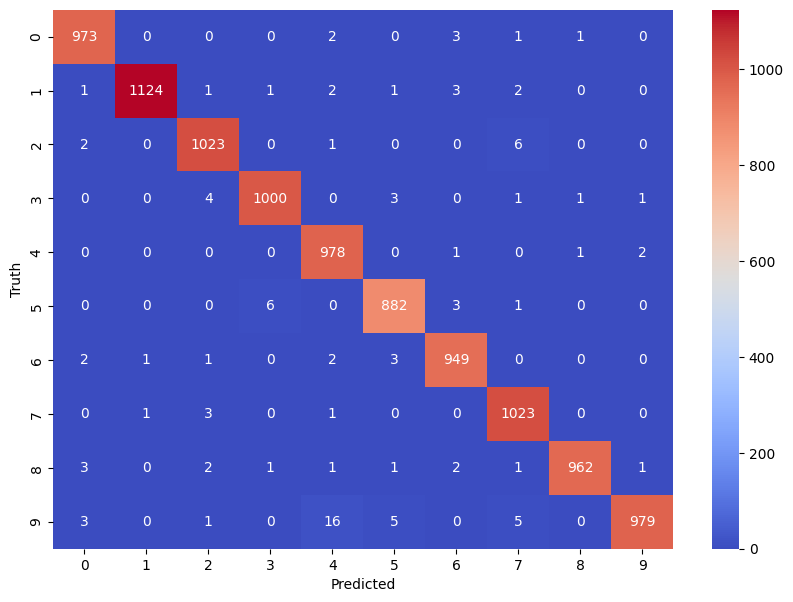

In [22]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Predicted Value:  9
Successful prediction


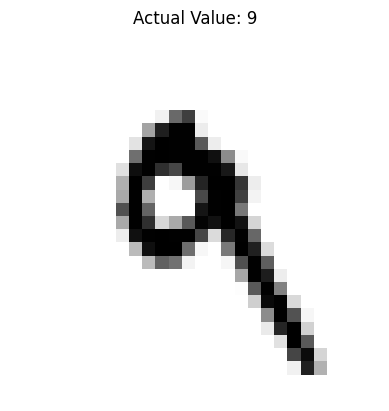

In [23]:
# Testing the Model
plt.imshow(x_test[7],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[7]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[7]))
if(y_test[7]==(np.argmax(prediction[7]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Predicted Value:  2
Successful prediction


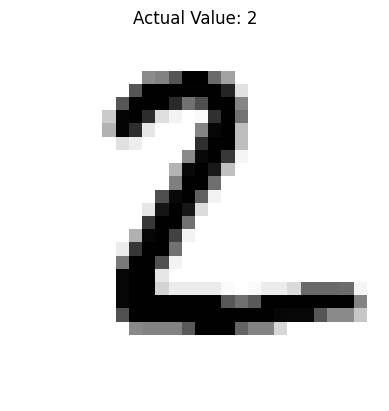

In [24]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')